In [20]:
from scipy.stats import binom
import matplotlib.pyplot as plt
import numpy as np
import random as rand
TEST_SEED = 1234
rand.seed(TEST_SEED)

In [119]:
# n and p values
n, p = 30, 0.40

# a place to store the bonom distrubtions
x = np.arange(0, n+1)

# Binomial Distrubtion

In [120]:
binomial_pmf = binom.pmf(x, n, p)
print(binomial_pmf)

[2.21073920e-07 4.42147839e-06 4.27409578e-05 2.65943738e-04
 1.19674682e-03 4.14872231e-03 1.15242286e-02 2.63410940e-02
 5.04870968e-02 8.22752689e-02 1.15185376e-01 1.39618638e-01
 1.47375229e-01 1.36038673e-01 1.10126545e-01 7.83122097e-02
 4.89451311e-02 2.68718367e-02 1.29382917e-02 5.44770178e-03
 1.99749065e-03 6.34124017e-04 1.72942914e-04 4.01027046e-05
 7.79774812e-06 1.24763970e-06 1.59953808e-07 1.57979069e-08
 1.12842192e-09 5.18814677e-11 1.15292150e-12]


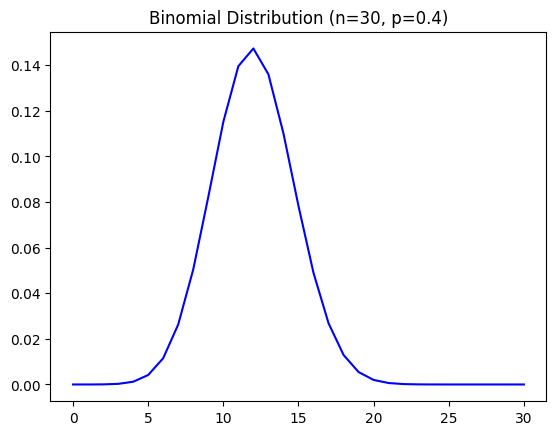

In [121]:
plt.plot(x, binomial_pmf, color='blue')
plt.title(f"Binomial Distribution (n={n}, p={p})")
plt.show()

In [ ]:
# assign where this agent sits on the distubution
agent_1_binom_index = rand.randint(0, n-1)

# and a number that will decide the success of connection
agent_1_prob = rand.randint(0, 1000) / 1000

In [ ]:
print(agent_1_prob)
print(agent_1_binom_index)

In [ ]:
# check the probability an agent has a connection
# x is the array of binomial distrubutions
# agent_1_binom_index is a randomly assign number between 0 and n-1
# agent_1_prob is a randomly assign number between 0.0 - 1.0

# if the agents probablity(agent_1_prob) falls within the distrubution the agent has a successful connection

x[agent_1_binom_index] < agent_1_prob

# Creating greens Connections

In [48]:
# Green Agent Class
# We must approriatley apply random seeds

class Green_Agent():
    def __init__(self, connection_prob: list):
        self.will_vote = 0.0
        self.not_vote = 0.0
        self.n, self.p = connection_prob[0], connection_prob[1]
        self.connections = list()
    
    def get_will_vote(self):
        return self.will_vote

    def get_not_vote(self):
        return self.not_vote

    def set_will_vote(self, value: int):
        self.will_vote = value

    def set_not_vote(self, value: int):
        self.not_vote = value

    def calculate_vote_status(self, interval: list):
        return

    def get_prob_index(self) -> int:
        return rand.randint(0, self.n)

    def get_prob_value(self) -> int:
        # 1000 is chosen for 3 decimal precsion
        # this may cause precision bugs!.. 
        return rand.randint(0, 1000) / 1000

    def get_connections(self) -> list:
        return self.connections

    def add_connection(self, conn: int) -> None:
        self.connections.append(conn)

In [57]:
def create_green_agents(num_green: int, connect_prob: list) -> list:
    green_agents = list()

    #green_adjlist = [ [] for _ in range(num_green)]

    # calculate bionomials
    binom_range = np.arange(0, connect_prob[0]+1)
    binomial_pmf = binom.pmf(binom_range, connect_prob[0], connect_prob[1])
    
    # construct num_green of Green Agents
    for i in range(num_green):
        new_agent = Green_Agent(connect_prob)
        green_agents.append(new_agent)

    
    # Check for connections between green agents
    for i, agent in enumerate(green_agents):

        for j in range(i+1, num_green):

            # When is j less than i we have already checked those connections
            # Thats why we start at  i+1
            
            # Recalcualte probabilty for each connection check
            g_index = agent.get_prob_index()
            g_value = agent.get_prob_value()

            # check if agent has a connection
            if g_value < binomial_pmf[g_index]:

                agent.add_connection(j)
                green_agents[j].add_connection(i)

    return green_agents


In [122]:
connection_prob = [30, 0.4]

num_green = 60

g_agents = create_green_agents(num_green, connection_prob)



In [123]:
for i, agent in enumerate(g_agents):
    adj_list = agent.get_connections()
    print(f"Agent #{i}: ", end="")
    for j in adj_list:
        print(f'{j} ', end="")
    print()

Agent #0: 11 
Agent #1: 24 38 
Agent #2: 3 35 
Agent #3: 2 
Agent #4: 31 
Agent #5: 12 16 35 
Agent #6: 
Agent #7: 19 23 46 
Agent #8: 28 
Agent #9: 31 57 
Agent #10: 15 25 39 49 
Agent #11: 0 
Agent #12: 5 53 
Agent #13: 27 28 
Agent #14: 
Agent #15: 10 
Agent #16: 5 42 
Agent #17: 50 
Agent #18: 
Agent #19: 7 34 
Agent #20: 
Agent #21: 
Agent #22: 39 
Agent #23: 7 
Agent #24: 1 40 59 
Agent #25: 10 
Agent #26: 
Agent #27: 13 42 
Agent #28: 8 13 
Agent #29: 30 32 45 47 
Agent #30: 29 31 43 58 
Agent #31: 4 9 30 48 
Agent #32: 29 47 58 
Agent #33: 51 
Agent #34: 19 58 
Agent #35: 2 5 
Agent #36: 
Agent #37: 
Agent #38: 1 43 51 
Agent #39: 10 22 58 
Agent #40: 24 
Agent #41: 
Agent #42: 16 27 45 51 55 
Agent #43: 30 38 
Agent #44: 53 
Agent #45: 29 42 
Agent #46: 7 
Agent #47: 29 32 
Agent #48: 31 59 
Agent #49: 10 
Agent #50: 17 
Agent #51: 33 38 42 
Agent #52: 
Agent #53: 12 44 
Agent #54: 
Agent #55: 42 
Agent #56: 
Agent #57: 9 
Agent #58: 30 32 34 39 
Agent #59: 24 48 
